In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv']


- 어느 소비자들이 훗날에 현금을 인출할 것인지를 구분하는 것이 목표
- 모든 변수들은 익명화되어 있어 무엇을 의미하는지 알 수 없음

In [9]:
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

# 전체적인 data

In [11]:
print('train shape : ', train.shape)
print('test shape : ', test.shape)

train shape :  (200000, 202)
test shape :  (200000, 201)


In [12]:
print('train ID_code is unique!' ) if len(train) == len(train.ID_code.unique()) else print('NO!')
print('test ID_code is unique!' ) if len(test) == len(test.ID_code.unique()) else print('NO!')

train ID_code is unique!
test ID_code is unique!


In [13]:
print('All features of train are float64') if len(train.columns[2:]) == sum([True for col in train.columns[2:] if train[col].dtype == 'float64']) else print('NO!')
print('All features of test are float64') if len(test.columns[1:]) == sum([True for col in train.columns[1:] if train[col].dtype == 'float64']) else print('NO!')

All features of train are float64
All features of test are float64


In [14]:
print('train data has no NAs') if train.isnull().sum().sum() == 0 else print('No')
print('test data has no NAs') if test.isnull().sum().sum() == 0 else print('No')

train data has no NAs
test data has no NAs


# target

In [15]:
train.target.hist()

In [16]:
#1의 개수가 전체 데잍어ㅢ 약 10%를 차지하므로 1을 잘 맞추는 것(훗날 인출할 사람 찾는 것)이 중요
print('1의 개수 : ', sum(train.target == 1))
print('1의 비율 : ',sum(train.target == 1) / len(train))

1의 개수 :  20098
1의 비율 :  0.10049


# var_0 ~var_199

In [17]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


## mean

In [18]:
import matplotlib.pyplot as plt

In [26]:
test.columns

Index(['ID_code', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5',
       'var_6', 'var_7', 'var_8',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=201)

In [27]:
#except target
train_mean = train.iloc[:,2:].mean()
test_mean = train.iloc[:,1:].mean()

Text(0.5, 1.0, 'mean by variables')

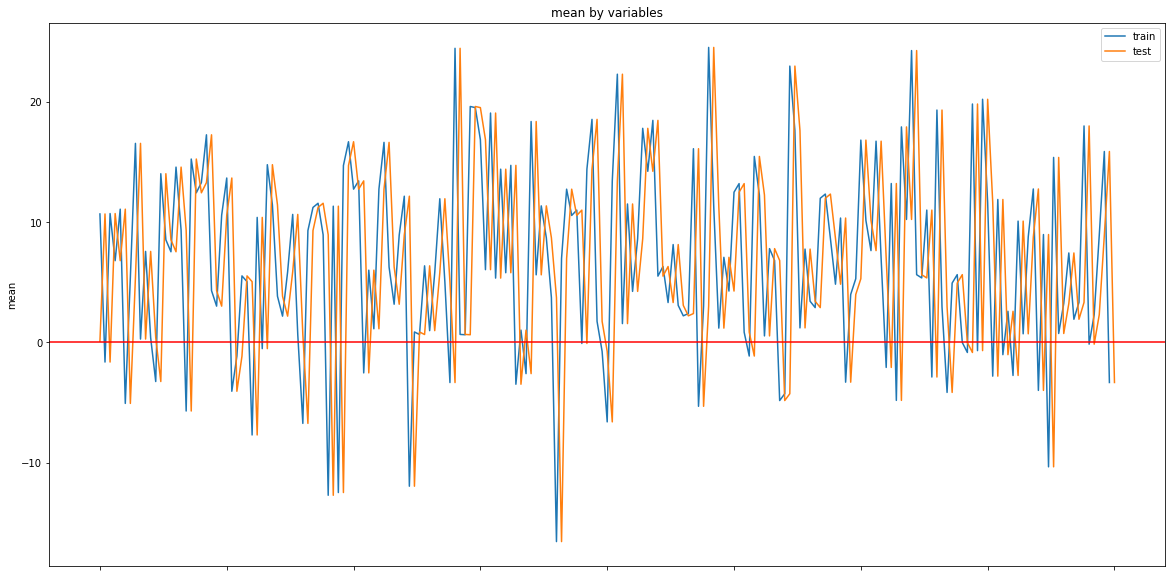

In [31]:
#train이나 test나 변수가 비슷하다.
plt.figure(figsize = (20,10))
train_mean.plot(label = 'train')
test_mean.plot(label = 'test')
plt.ylabel('mean')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()
plt.title('mean by variables')

In [21]:
#변수별 평균이 0보다 작은 값은 몇 개 되지 않음.
train_mean[train_mean < 0]

var_1      -1.627622
var_5      -5.065317
var_11     -3.245596
var_17     -5.696731
var_26     -4.055133
var_27     -1.137908
var_30     -7.687740
var_32     -0.512886
var_40     -6.725505
var_45    -12.699667
var_47    -12.471737
var_52     -2.528816
var_61    -11.946744
var_69     -3.331515
var_82     -3.471273
var_84     -2.590209
var_90    -16.548147
var_95     -0.084344
var_99     -0.746296
var_100    -6.600518
var_118    -5.305132
var_128    -1.127952
var_134    -4.826053
var_135    -4.259472
var_147    -3.300779
var_155    -2.074128
var_157    -4.813552
var_164    -2.871906
var_167    -4.151155
var_170    -0.004962
var_171    -0.831777
var_173    -0.677967
var_176    -2.799585
var_178    -1.014064
var_180    -2.741666
var_185    -3.983261
var_187   -10.335043
var_195    -0.142088
var_199    -3.326537
dtype: float64

## variance

In [35]:
#except target
train_var = train.iloc[:,2:].var()
test_var = test.iloc[:,1:].var()

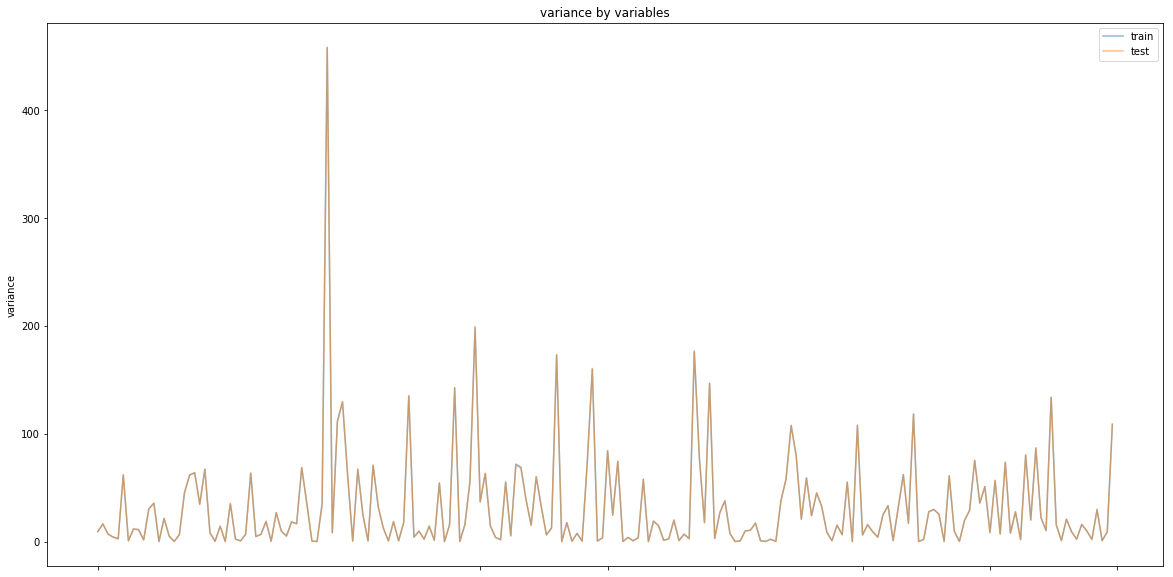

In [51]:
plt.figure(figsize = (20,10))
train_var.plot(label = 'train', alpha = 0.5)
test_var.plot(label = 'test', alpha = 0.5)
plt.ylabel('variance')
plt.title('variance by variables')
plt.legend()

(array([155.,  15.,  10.,   5.,   5.,   3.,   0.,   3.,   3.,   1.]),
 array([1.09799863e-07, 1.08473285e-01, 2.16946460e-01, 3.25419635e-01,
        4.33892810e-01, 5.42365985e-01, 6.50839160e-01, 7.59312335e-01,
        8.67785510e-01, 9.76258685e-01, 1.08473186e+00]),
 <a list of 10 Patch objects>)

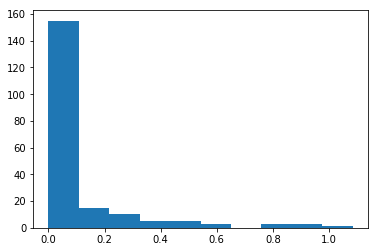

In [50]:
#train data 변수들의 분산과 test data 변수들의 분산의 차이를 histogram으로
#차이가 거의 나지 않음
plt.hist(np.abs(train_var-test_var), bins=10)

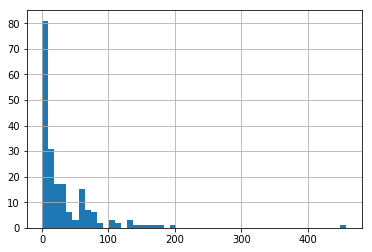

In [24]:
#대부분 변수들의 분산은 0근처에
train_var.hist(bins = 50)

In [25]:
train_var.sort_values(ascending=False)[:5]

var_45     458.170238
var_74     199.165216
var_117    176.827823
var_90     172.996399
var_97     159.829825
dtype: float64

## correlation

### target 과의 관계

In [ ]:
target_corr = train.corr().iloc[0]

In [104]:
#target과의 상관관계가 특별히 높은 변수가 보이지 않음.
np.abs(target_corr).sort_values(ascending = False).head()

target     1.000000
var_81     0.080917
var_139    0.074080
var_12     0.069489
var_6      0.066731
Name: target, dtype: float64

### 변수들간의 관계

In [108]:
train_corr = train.iloc[:,2:].corr()

In [87]:
def highest_corr(data) :
    my_dict = {}
    
    for col in data.columns :
        aa = np.abs(data[col])
        aa = aa[aa<1]
        
        my_dict[col] = [aa.max()]
        
    return(pd.DataFrame(my_dict))

In [109]:
highest_corr(train_corr)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0.007402,0.008855,0.008795,0.00714,0.00708,0.005736,0.008958,0.005396,0.005311,0.007182,...,0.00757,0.007798,0.007355,0.008163,0.006228,0.007932,0.007461,0.007517,0.007545,0.006096


In [120]:
np.triu(np.ones(train_corr.shape),k=1)

array([[0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [114]:
correlations = train_corr.where(np.triu(np.ones(train_corr.shape),k=1).astype(np.bool))
correlations_df = correlations.abs().unstack().dropna().sort_values(ascending = False).reset_index()
correlations_df.head()

,level_0,level_1,0
0,var_139,var_26,0.009844
1,var_148,var_53,0.009788
2,var_165,var_81,0.009714
3,var_174,var_81,0.009490
4,var_189,var_183,0.009359


In [121]:
correlations_df.tail()

,level_0,level_1,0
19895,var_177,var_100,3.116544e-07
19896,var_144,var_27,1.772502e-07
19897,var_126,var_109,1.313947e-07
19898,var_173,var_6,5.942735e-08
19899,var_191,var_75,2.703975e-08
